# Regression Decision Tree
Previously, we wanted to take data to classify the result, i.e. diabetic or not. In this case, we want to make a numerical prediction.

Before: Output = category
Now: Output = number

In this lesson we will look at predicted mpg for cars using a UCMI dataset.

In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor #Import Regression Decision Tree
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [3]:
auto_mpg = pd.read_csv("https://raw.githubusercontent.com/modengann/Data-sets/master/auto-mpg.csv")
auto_mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [4]:
auto_mpg.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

Break up the origin column into their respective columns: USA, Europe, and Japan. And we should drop the car name column as each value is unique and will not produce generalizable information.

In [5]:
auto_mpg['origin_usa'] = (auto_mpg['origin'] == 1).astype(int)
auto_mpg['origin_europe'] = (auto_mpg['origin'] == 2).astype(int)
auto_mpg['origin_japan'] = (auto_mpg['origin'] == 3).astype(int)
auto_mpg.drop(["origin", "car name"], axis = 1, inplace = True)
auto_mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_usa,origin_europe,origin_japan
0,18.0,8,307.0,130,3504,12.0,70,1,0,0
1,15.0,8,350.0,165,3693,11.5,70,1,0,0
2,18.0,8,318.0,150,3436,11.0,70,1,0,0
3,16.0,8,304.0,150,3433,12.0,70,1,0,0
4,17.0,8,302.0,140,3449,10.5,70,1,0,0
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,0,0
394,44.0,4,97.0,52,2130,24.6,82,0,1,0
395,32.0,4,135.0,84,2295,11.6,82,1,0,0
396,28.0,4,120.0,79,2625,18.6,82,1,0,0


In [6]:
auto_mpg['horsepower'] = pd.to_numeric(auto_mpg['horsepower'], errors='coerce')
auto_mpg.dropna(inplace = True)

In [7]:
feature_cols = auto_mpg.columns[1:]
feature_cols

Index(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
       'model year', 'origin_usa', 'origin_europe', 'origin_japan'],
      dtype='object')

In [8]:
X = auto_mpg[feature_cols] # Features
y = auto_mpg["mpg"] # Target variable

In [9]:
X

,cylinders,displacement,horsepower,weight,acceleration,model year,origin_usa,origin_europe,origin_japan
0,8,307.0,130.0,3504,12.0,70,1,0,0
1,8,350.0,165.0,3693,11.5,70,1,0,0
2,8,318.0,150.0,3436,11.0,70,1,0,0
3,8,304.0,150.0,3433,12.0,70,1,0,0
4,8,302.0,140.0,3449,10.5,70,1,0,0
...,...,...,...,...,...,...,...,...,...
393,4,140.0,86.0,2790,15.6,82,1,0,0
394,4,97.0,52.0,2130,24.6,82,0,1,0
395,4,135.0,84.0,2295,11.6,82,1,0,0
396,4,120.0,79.0,2625,18.6,82,1,0,0


In [10]:
y

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 392, dtype: float64

Train to test split of 80-20. This is a value that can be tweaked to increase accuracy.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # 80% training and 20% test due to the large size of the data

In [12]:
X_train.dtypes

cylinders          int64
displacement     float64
horsepower       float64
weight             int64
acceleration     float64
model year         int64
origin_usa         int32
origin_europe      int32
origin_japan       int32
dtype: object

dt is our DecisionTreeRegressor. Biggest difference: min_samples_leaf is used to determine the smallest size leaf. The smallest leaf in this case will contain 13% of our data.

In [13]:
dt = DecisionTreeRegressor(max_depth=8,
                           min_samples_leaf=0.13)


# Fit dt to the training set
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, min_samples_leaf=0.13)

Now we will calculate the error using Root Mean Squared Error (RSME). Unlike with our classifier, we want to measure error by how far we off numerically, not just the percentage that were incorrectly classified.

RMSE (Root Mean Square Error) is commonly used in regression analysis, including regression decision trees, because it provides a measure of how much the predicted values deviate from the actual values. It does this by squaring the differences (errors) between predicted and actual values, averaging them, and then taking the square root. This approach gives a clear idea of error magnitude and treats larger errors more harshly (due to squaring), which is often desirable in predictive modeling. Other options include Mean Absolute Error (MAE) and Mean Absolute Percentage Error (MAPE). RMSE is often preferred because it is in the same units as the response variable and emphasizes larger errors, which can be crucial in many real-world scenarios. However, the "best" choice depends on the specific context and requirements of the analysis.

In [14]:
from sklearn.metrics import mean_squared_error as MSE

# Compute y_pred
y_pred = dt.predict(X_test)

# Compute mse_dt
mse_dt = MSE(y_test, y_pred)

# Compute rmse_dt
rmse_dt = mse_dt**(1/2)

# Print rmse_dt
print("Test set RMSE of dt: {:.2f}".format(rmse_dt))

Test set RMSE of dt: 3.75


In [15]:
import numpy as np
from math import sqrt

range_target = np.max(auto_mpg["mpg"]) - np.min(auto_mpg["mpg"])

std_dev_target = np.std(auto_mpg["mpg"])
print("RMSE as a percentage of the range: ", (rmse_dt/range_target) * 100, "%")
print("RMSE as a percentage of the standard deviation: ", (rmse_dt/std_dev_target) * 100, "%")

RMSE as a percentage of the range:  9.967767663112804 %
RMSE as a percentage of the standard deviation:  48.08029042334474 %


An RMSE close to or smaller than the standard deviation could indicate a reasonable model performance, but if RMSE is significantly higher than the standard deviation, it suggests the model predictions are not very accurate.

In [18]:
!pip install pydotplus

  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24575 sha256=d110ad607157d1190ad9bfba389c97139abc2ab4d6adbf2527087f6f959d5ab1
  Stored in directory: c:\users\cmoden\appdata\local\pip\cache\wheels\89\e5\de\6966007cf223872eedfbebbe0e074534e72e9128c8fd4b55eb
Successfully built pydotplus


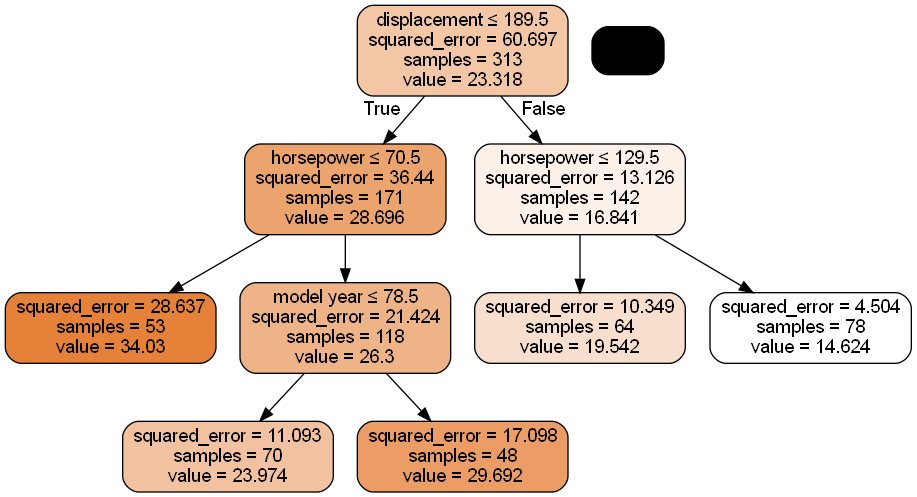

In [19]:
from sklearn.tree import export_graphviz
from io import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())